In [267]:
%%HTML

<h2>Data Wrangling , Modelling & Analysis</h2>

<p> We have January iso8583 web transactions of ABC Bank</p>

In [268]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [269]:
# Importing the data

data = pd.read_csv("Fortiate_2_1_All_Situations.csv")
#data = pd.read_excel("Sample_Data_for Modelling.xlsx")

data.describe()
data.columns

Index(['DE0', 'DE2', 'DE3', 'DE4', 'DE5', 'DE6', 'DE7', 'DE18', 'DE19', 'DE22',
       'DE25', 'DE26', 'DE38', 'DE39', 'DE41', 'DE42', 'DE48', 'DE49', 'DE55',
       'DE60', 'DE61', 'DE90', 'DE127', 'DE300', 'DE301', 'DE1004', 'DE2004',
       'DE3004', 'DE4004', 'DE5004'],
      dtype='object')

In [270]:
Total_Txns = data.DE2.count()
Total_Txns

Visa_Txns = data.DE61[data.DE61=='visa'].count()
Mastercard_Txns = data.DE61[data.DE61=='mastercard'].count()
Rupay_Txns = data.DE61[data.DE61=='rupay'].count()

Groffers_Txns = data.DE4[data.DE42=='GROFERS11797900'].values.tolist()
Cleartrip_Txns = data.DE4[data.DE42=='CLEARTRIP689430'].values.tolist()
Payu_Txns = data.DE4[data.DE42=='PAYUPAISA477790'].values.tolist()

Merchants = data.DE41.values.tolist()

Dates = data.DE7.astype(str).values.tolist()
#Dates = data.DE7.values.tolist()

Days = [int(n[1:3]) for n in Dates]
Hours = [int(n[3:5]) for n in Dates]

Amounts = data.DE4.values.tolist()

#Day_Amount_Total = [sum(x) for x in zip(Days, Amounts)]



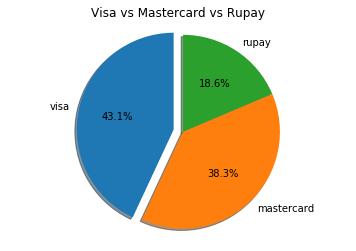

In [271]:
labels = "visa","mastercard","rupay"
visa = (Visa_Txns/Total_Txns)*100
mastercard = (Mastercard_Txns/Total_Txns)*100
rupay = (Rupay_Txns/Total_Txns)*100
sizes = [visa, mastercard, rupay]
explode = (0.1, 0 , 0)  # only "explode" the 1st slice (i.e. "Survived)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Visa vs Mastercard vs Rupay")

plt.show()

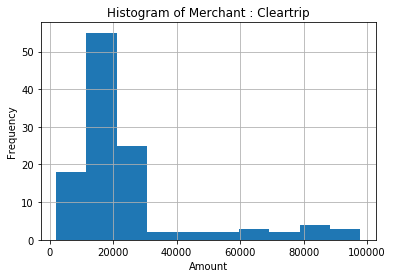

In [272]:
data.DE4[data.DE42=='CLEARTRIP689430'].hist()
plt.title("Histogram of Merchant : Cleartrip")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

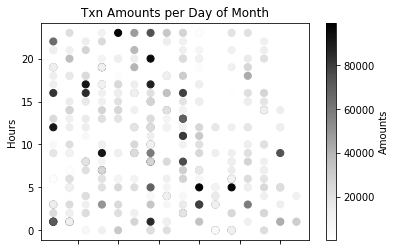

In [273]:
#Creating DataFrame

Amounts_data = {"Days": Days,"Hours": Hours,"Amounts": Amounts, "Merchants": Merchants}
Amounts_data = pd.DataFrame(Amounts_data, columns = ["Days", "Hours","Amounts","Merchants"])

# Barh Graph Generation
#Amounts_data.plot(x="Days", y="Hours", C = "Amounts", gridsize=25, kind = "hexbin")
Amounts_data.plot(x="Days", y="Hours",c = "Amounts", s=50,  kind = "scatter")


#Amounts_data.plot.scatter(Days,Hours,Amounts);

#plt.scatter(Amounts_data.Days,Amounts_data.Hours,Amounts_data.Amounts)
plt.xlabel("Days of Month")
plt.title("Txn Amounts per Day of Month")
plt.show()
